<a href="https://colab.research.google.com/github/icanshiv/datasets/blob/master/cancer_patient_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q datascience
!pip install -q pandas profiling


     |████████████████████████████████| 69 kB 2.5 MB/s 
     |████████████████████████████████| 634 kB 9.8 MB/s 


# New Section

In [2]:
!pip install -q --upgrade pandas profiling
!pip install -q --pandas yellowbrick


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --pandas


In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', lambda x: '%5f' % x)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split              
from sklearn.ensemble import RandomForestClassifier               
from sklearn.linear_model import LogisticRegression          
from sklearn.decomposition import PCA

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
cancer = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/cancer.csv")
print('Shape of the dataset:', cancer.shape)
cancer.head()

Shape of the dataset: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,NaN
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,NaN
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,NaN
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,NaN
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,NaN


In [9]:
cancer.shape

(569, 33)

In [10]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.000000
mean,30371831.432337,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,125020585.612224,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8670.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,869218.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,906024.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8813129.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,911320502.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
cancer.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [12]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [13]:
cancer.skew()

id                        6.473752
radius_mean               0.942380
texture_mean              0.650450
perimeter_mean            0.990650
area_mean                 1.645732
smoothness_mean           0.456324
compactness_mean          1.190123
concavity_mean            1.401180
concave points_mean       1.171180
symmetry_mean             0.725609
fractal_dimension_mean    1.304489
radius_se                 3.088612
texture_se                1.646444
perimeter_se              3.443615
area_se                   5.447186
smoothness_se             2.314450
compactness_se            1.902221
concavity_se              5.110463
concave points_se         1.444678
symmetry_se               2.195133
fractal_dimension_se      3.923969
radius_worst              1.103115
texture_worst             0.498321
perimeter_worst           1.128164
area_worst                1.859373
smoothness_worst          0.415426
compactness_worst         1.473555
concavity_worst           1.150237
concave points_worst

In [14]:
cancer.value_counts('symmetry_worst')

symmetry_worst
0.238300    3
0.236900    3
0.319600    3
0.222600    3
0.297200    3
0.310900    3
0.321600    2
0.271000    2
0.236400    2
0.303500    2
0.268800    2
0.269100    2
0.269400    2
0.358500    2
0.302000    2
0.240400    2
0.359600    2
0.230000    2
0.361300    2
0.229300    2
0.273600    2
0.226800    2
0.274100    2
0.305500    2
0.243400    2
0.306000    2
0.298300    2
0.318700    2
0.255700    2
0.320600    2
0.253000    2
0.257200    2
0.257600    2
0.322000    2
0.251000    2
0.259000    2
0.315100    2
0.325800    2
0.311300    2
0.310500    2
0.310300    2
0.245800    2
0.310100    2
0.331300    2
0.265100    2
0.337900    2
0.274400    2
0.255600    2
0.222700    2
0.216000    2
0.282900    2
0.284900    2
0.286800    2
0.282700    2
0.295500    2
0.282600    2
0.287100    2
0.289400    2
0.178300    2
0.288400    2
0.277900    2
0.280600    2
0.284100    2
0.298200    1
0.310800    1
0.311000    1
0.288900    1
0.310000    1
0.290100    1
0.290800    1
0.308

In [15]:
cancer.isnull().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [16]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
# profile = ProfileReport(df=cancer)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

In [18]:
def delete_cancer(data=None):
    data.drop(columns=['Unnamed: 32'], inplace=True)
    return data.head()

In [19]:
delete_cancer(data=cancer)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780


In [20]:
def convert_diagnosis(data=None):
    return data['diagnosis'].map(arg={'M':1, 'B': 0})

In [21]:
cancer['diagnosis'] = convert_diagnosis(data=cancer)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,842517,1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,84300903,1,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,84348301,1,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,84358402,1,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780


In [22]:
# profile = ProfileReport(df=cancer)
# profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

In [23]:
def diagnosis_checker(data=None):
  fig, ax = plt.subplots(figsize=(10, 7))

  sns.countplot(y='diagnosis', data=data, palette='rocket', ax=ax)

  total = data.shape[0]
  for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

  plt.xlabel(xlabel='Count', size=14)
  plt.ylabel(ylabel='Diagnosis', size=14)
  plt.title(label='Diagnosis count and proportion', size=16)
  plt.grid(b=True)

  plt.show()  

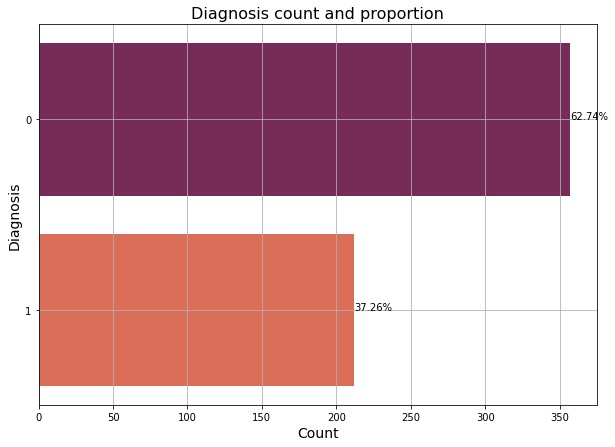

In [24]:
diagnosis_checker(data=cancer)

In [25]:
def make_displot(data=None, column=None):
  sns.displot(x=column,
              hue='diagnosis',
              kde=True,
              data=data,
              palette='hls',
              aspect=3)
  
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel(xlabel=column, size=14)
  plt.ylabel(ylabel='Count', size=14)
  plt.title(label=('diagnosis on basis of' " "+ column), size=16)
  plt.grid(b=True)
  plt.show()
    

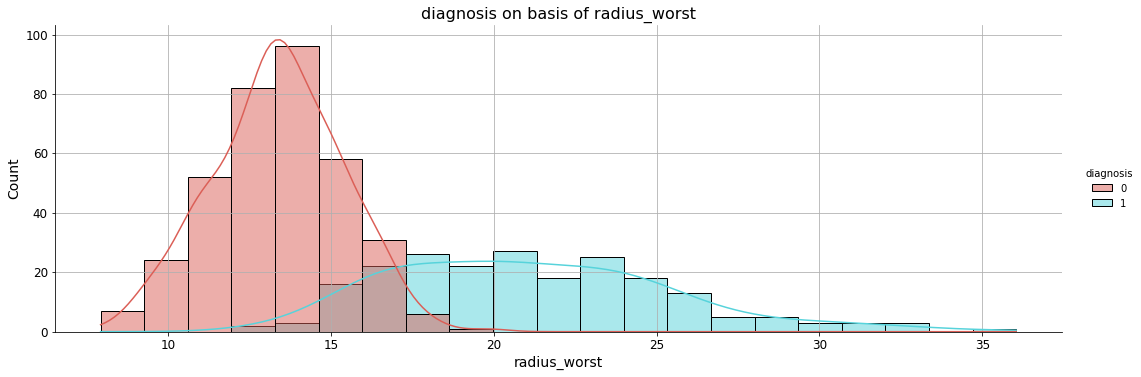

In [26]:
make_displot(data=cancer, column='radius_worst')

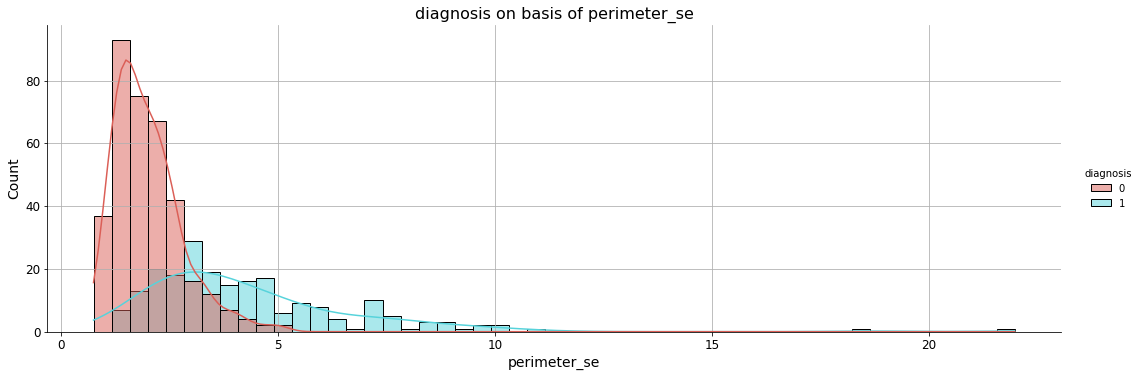

In [27]:

make_displot(data=cancer, column='perimeter_se')

In [28]:
def make_scatter(data=None, column_x=None, column_y=None):
  fig = plt.figure(figsize=(10, 10)) 
  sns.scatterplot(x=column_x,
                  y=column_y,
                  hue='diagnosis',
                  data=data,
                  palette='Dark2',
                  edgecolor='black')
  
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel(xlabel=column_x, size=14)
  plt.ylabel(ylabel=column_y, size=14)
  plt.title(label=(column_x + 'vs'+ column_y + ' with respect to diagnosis'), size=16)
  plt.legend(labels=['Malignant','Benign'])
  plt.grid(b=True)
  plt.show()

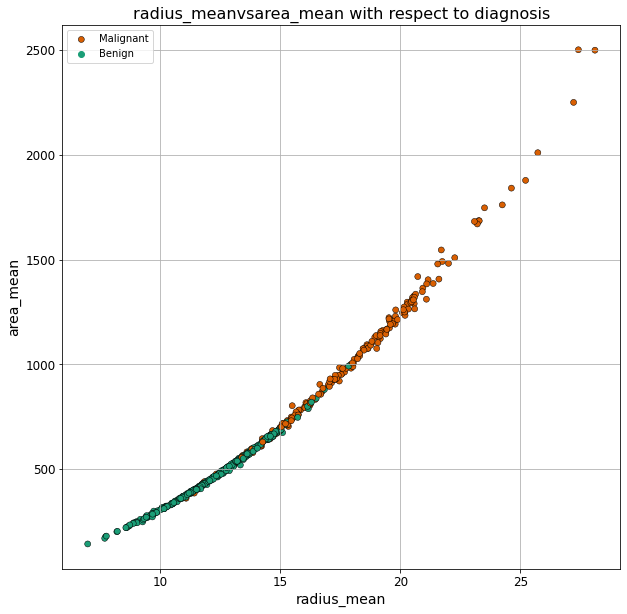

In [29]:

make_scatter(data=cancer, column_x='radius_mean', column_y='area_mean')

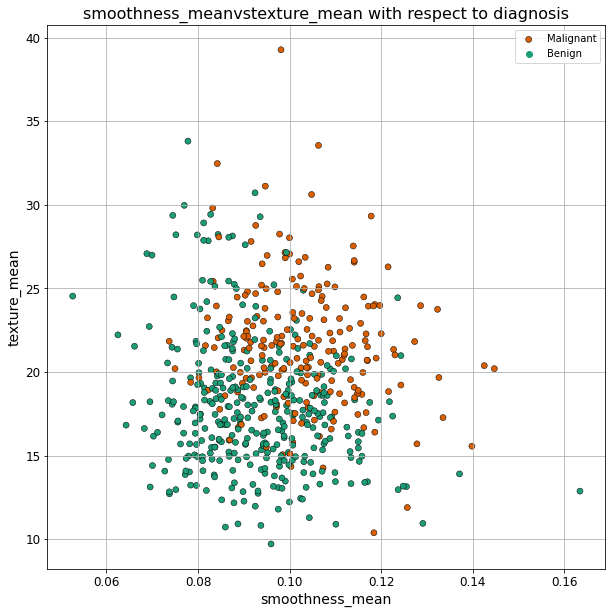

In [30]:
 make_scatter(data=cancer, column_x='smoothness_mean', column_y='texture_mean')

In [31]:
def feature_extract(data=None):
  X = data.drop(labels = ['diagnosis'], axis=1)
  y = data['diagnosis']
  return X, y


In [32]:
X, y = feature_extract(data=cancer)

In [33]:
def scale_data(X=None):
  sc = StandardScaler()
  scaled_data = sc.fit_transform(X)
  scaled_X = pd.DataFrame(data=scaled_data, columns=X.columns)
  return scaled_X


In [34]:
scaled_X = scale_data(X=X)
scaled_X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [35]:
scaled_X.info(sum)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [36]:

def data_split(X=None, y=None):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42, stratify = y)
  print('Traing Data Shape:',X_train.shape, y_train.shape)
  print('Testing Data Shape:', X_test.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

In [37]:
X_train, X_test, y_train, y_test = data_split(X=scaled_X, y=y)

Traing Data Shape: (426, 31) (426,)
Testing Data Shape: (143, 31) (143,)


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split              
from sklearn.ensemble import RandomForestClassifier               
from sklearn.linear_model import LogisticRegression          
from sklearn.decomposition import PCA

In [39]:
def models_initialize():
  return [RandomForestClassifier(random_state=0), (LogisticRegression(random_state=0))]

In [40]:
clfs = models_initialize()
clfs

[RandomForestClassifier(random_state=0), LogisticRegression(random_state=0)]

In [41]:
def train_n_eval(clfs=None, X_train=None, y_train=None, X_test=None, y_test=None):

  for clf in clfs:
    # Extracting model name
    model_name = type(clf).__name__
    # Fit the model on train data
    clf.fit(X_train, y_train)

    # Make predictions using train data
    y_pred_train = clf.predict(X_train)

    # Calculate accuracy of the model
    clf_train_accuracy = accuracy_score(y_train, y_pred_train)

    # Make predictions using test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy of the model
    clf_accuracy = accuracy_score(y_test, y_pred)

    # Display the accuracy of the model
    print('----------------------------------------\n')
    print('Performance Metric of', model_name, ':')
    print('[Train Accuracy]:', clf_train_accuracy)
    print('[Test Accuracy]:', clf_accuracy)
    print('----------------------------------------\n')

In [42]:
train_n_eval(clfs=clfs, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

----------------------------------------

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.9790209790209791
----------------------------------------

----------------------------------------

Performance Metric of LogisticRegression :
[Train Accuracy]: 0.9882629107981221
[Test Accuracy]: 0.965034965034965
----------------------------------------



In [43]:
def generate_pca(X_train=None, X_test=None):
    pca = PCA(n_components=11, random_state=0)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    print('Shape of train set after PCA reduction:', X_train.shape)
    print('Shape of test set after PCA reduction:', X_test.shape)
    return X_train, X_test

In [44]:
X_train_pca, X_test_pca = generate_pca(X_train=X_train, X_test=X_test)

Shape of train set after PCA reduction: (426, 11)
Shape of test set after PCA reduction: (143, 11)


In [46]:
# Modelling Development & Evaluation without PCA
def models_initialize():
  return [RandomForestClassifier(random_state=0), LogisticRegression(random_state=0)]

In [48]:
clfs = models_initialize()
clfs

[RandomForestClassifier(random_state=0), LogisticRegression(random_state=0)]

In [49]:
def train_n_eval(clfs=None, X_train=None, y_train=None, X_test=None, y_test=None):

  for clf in clfs:
    model_name = type(clf).__name__
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    clf_train_accuracy = accuracy_score(y_train, y_pred_train)
    y_pred = clf.predict(X_test)
    clf_accuracy = accuracy_score(y_test, y_pred)
    print('----------------------------------------\n')
    print('Performance Metric of', model_name, ':')
    print('[Train Accuracy]:', clf_train_accuracy)
    print('[Test Accuracy]:', clf_accuracy)
    print('----------------------------------------\n')

In [50]:
train_n_eval(clfs=clfs, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

----------------------------------------

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.9790209790209791
----------------------------------------

----------------------------------------

Performance Metric of LogisticRegression :
[Train Accuracy]: 0.9882629107981221
[Test Accuracy]: 0.965034965034965
----------------------------------------



- In this section, we will reduce the train and test set using Principal Component Analysis.

In [63]:
def apply_pca():
  pca = PCA(n_components=0.95, random_state=0)
  pca.fit(X_train)
  var = np.cumsum(a=np.round(a=pca.explained_variance_ratio_, decimals=3)*100)
  print(str(len(pca.explained_variance_ratio_))+' components explain '+str(var[-1])+'% variance of the data')

  fig = plt.figure(figsize=(10,7))

  plt.plot(var)
  plt.ylabel(ylabel='% Variance Explained', size=14)
  plt.xlabel(xlabel='Number of Features', size=14)
  plt.title(label='PCA Analysis', size=16)
  plt.xticks(size=15)
  plt.yticks(size=12)
  plt.ylim(bottom=30, top=100)
  plt.grid(b=True)
  plt.show()

11 components explain 95.39999999999999% variance of the data


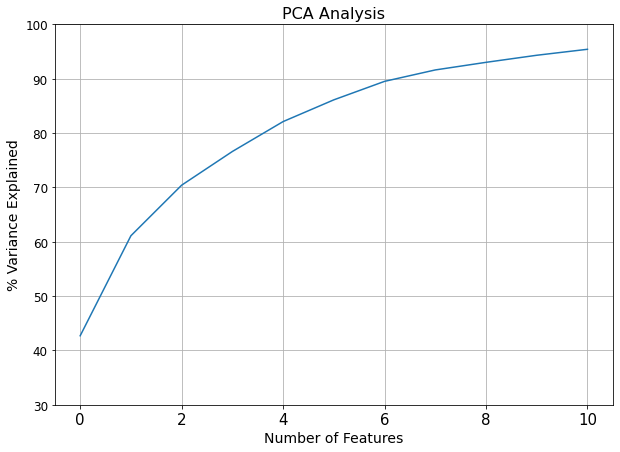

In [64]:
apply_pca()

In [65]:
#Create a functioin to apply PCA on X with number of principal components = 11.
def generate_pca(X_train=None, X_test=None):
    pca = PCA(n_components=11, random_state=0)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    print('Shape of train set after PCA reduction:', X_train.shape)
    print('Shape of test set after PCA reduction:', X_test.shape)
    return X_train, X_test

In [66]:
X_train_pca, X_test_pca = generate_pca(X_train=X_train, X_test=X_test)

Shape of train set after PCA reduction: (426, 11)
Shape of test set after PCA reduction: (143, 11)


In [67]:
#8.3 Modelling Development & Evaluation after PCA
train_n_eval(clfs=models_initialize(), X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

----------------------------------------

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.951048951048951
----------------------------------------

----------------------------------------

Performance Metric of LogisticRegression :
[Train Accuracy]: 0.9882629107981221
[Test Accuracy]: 0.972027972027972
----------------------------------------



In [68]:
#Observations:

#We can see that the newly trained models have scored similar accuracies.

#These models seem to be fitted well on the reduced data.

#We observe a comparable accuracy even after reducing the features.